# Import packages

In [1]:
import polars as pl
import polars.selectors as cs
import numpy as np
import src.plotting_functions as plotting
from importlib import reload
from src.utils import read_gtf, collapse_isoforms_to_proteoforms, read_SJ, gtf_to_SJ
from src.ryp import to_r, r
from pathlib import Path
import os
import seaborn as sns
import matplotlib.pyplot as plt

Loading required package: svglite

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



# Transcript saturation

In [9]:
expression = pl.read_parquet("nextflow_results/V47/fulll_expression.parquet")
filtered_lite_classification = pl.read_csv("nextflow_results/V47/merged_collapsed_classification.filtered_lite_classification.txt", separator="\t", null_values="NA")
expression = expression\
    .filter(
        pl.col("isoform").is_in(filtered_lite_classification["isoform"])
    )

In [10]:
expression

isoform,iPSC_1,iPSC_2,iPSC_3,NPC_1_1,NPC_1_3,NPC_2_1,NPC_2_2,NPC_3_1,NPC_3_3,CN_1_2,CN_1_3,CN_2_1,CN_2_2,CN_3_1,CN_3_2
str,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32
"""PB.1.27""",0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
"""PB.1.3""",0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
"""PB.1.30""",0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
"""PB.1.51""",0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
"""PB.10.1""",0,0,0,0,0,2,4,4,3,0,0,0,3,2,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""PB.99963.3""",0,0,0,2,5,0,4,6,5,0,0,0,0,0,0
"""PB.99963.38""",0,0,0,4,2,0,0,2,0,0,0,0,0,2,0
"""PB.99963.4""",0,0,0,0,0,0,0,0,2,0,0,0,0,0,0


In [3]:
expression\
    .filter(
        
    )

isoform,iPSC_1,iPSC_2,iPSC_3,NPC_1_1,NPC_1_3,NPC_2_1,NPC_2_2,NPC_3_1,NPC_3_3,CN_1_2,CN_1_3,CN_2_1,CN_2_2,CN_3_1,CN_3_2
str,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32
"""PB.1.1""",0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
"""PB.1.10""",0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
"""PB.1.11""",0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
"""PB.1.12""",0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
"""PB.1.13""",0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""PB.99996.1""",0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
"""PB.99997.1""",0,0,0,0,0,0,0,2,0,0,0,0,0,0,2
"""PB.99998.1""",0,0,0,0,0,0,0,0,0,0,0,0,0,2,0


FileNotFoundError: No such file or directory (os error 2): merged_collapsed_classification.filtered_lite_classification.txt

In [ ]:
filtered_lite_classification

Text(0, 0.5, 'Number of high-confidence transcript models')

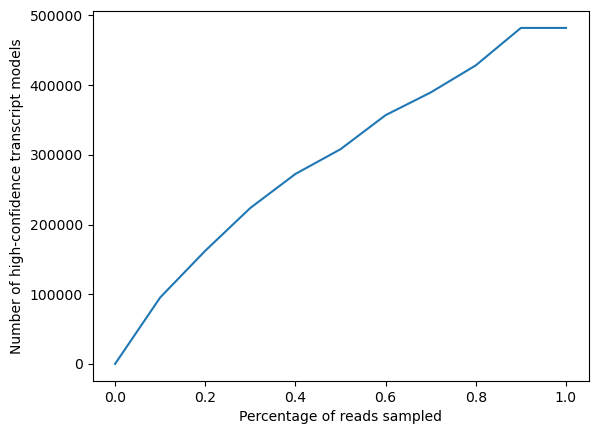

In [8]:
def get_n_isoforms(expression, percentage):
    return (expression.select( cs.numeric() )*percentage)\
        .with_columns(
            cs.all() > 5
        )\
        .filter(
            pl.sum_horizontal(cs.boolean()) > 2
        ).shape[0]    
x = np.arange(0, 1.1, 0.1)
y = [get_n_isoforms(expression, x) for x in x]
plt.plot(x, y)
plt.xlabel("Percentage of reads sampled")
plt.ylabel("Number of high-confidence transcript models")

# Short-read splice junction

## Load datasets

In [2]:
SR_SJ = pl.concat([read_SJ(file) for file in Path("STAR_results").rglob("*_SJ.out.tab")], how="vertical")\
    .unique(["chrom", "start", "end", "strand"])\
    .select(["chrom", "start", "end", "strand"])\
    .with_columns(
        strand = pl.col("strand").map_elements(lambda s: "+" if s == 1 else "-", return_dtype=pl.String)
    )\
    .with_columns(
        SR = pl.lit(True)
    )

LR_SJ = read_gtf("nextflow_results/V47/final_transcripts.gtf")\
    .pipe(gtf_to_SJ)

gencode_V47_SJ = read_gtf("".join([os.getenv("GENOMIC_DATA_DIR"), "/GENCODE/gencode.v47.annotation.gtf"]))\
    .filter(pl.col("feature") == "exon")\
    .pipe(gtf_to_SJ)    

In [4]:
LR_SJ_novel = LR_SJ\
    .filter(pl.col("start").is_null().not_())\
    .with_columns(
        LR = pl.lit(True)
    )\
    .join(
        gencode_V47_SJ["chrom", "start", "end", "strand"].with_columns(GENCODE=pl.lit(True)),
        on=["chrom", "start", "end", "strand"],
        how="full",
        coalesce = True
    )\
    .join(
        SR_SJ, on=["chrom", "start", "end", "strand"],
        how="full",
        coalesce = True
    )
LR_SJ_novel = LR_SJ_novel\
    .with_columns(
        pl.col("LR").fill_null(False),
        pl.col("GENCODE").fill_null(False),
        pl.col("SR").fill_null(False)
    )
to_r(LR_SJ_novel, "LR_SJ_novel")

In [43]:
r("library(ggpie)")

## Venn diagram

null device 
          1 


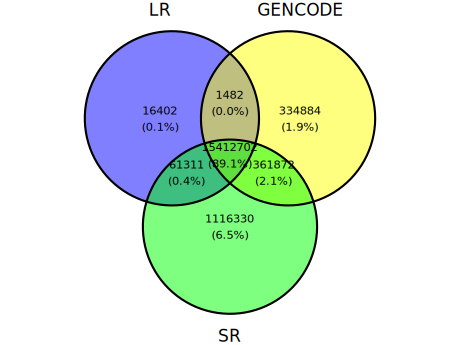

In [10]:
r(
    """
    library(ggvenn)
    ggvenn(
        LR_SJ_novel, c("LR", "GENCODE", "SR"),
        show_elements = FALSE
    )
    """
)


## Percentage of novel LR SJ validated by short-read SJ

In [66]:
novel = LR_SJ_novel\
    .filter(
        pl.col("GENCODE").not_(),
        pl.col("LR")
    )\
    .group_by("SR")\
    .len()\
    .with_columns(
        (pl.col("len") / pl.sum("len")).alias("percent")*100,
        type = pl.lit("novel")
    )\
    .filter(
        pl.col("SR")
    )
known = LR_SJ_novel\
    .filter(
        pl.col("GENCODE"),
        pl.col("LR")
    )\
    .group_by("SR")\
    .len()\
    .with_columns(
        (pl.col("len") / pl.sum("len")).alias("percent")*100,
        type = pl.lit("knwon")
    )\
    .filter(
        pl.col("SR")
    )
df = pl.concat([known, novel], how = "vertical")

Text(0.5, 0, '')

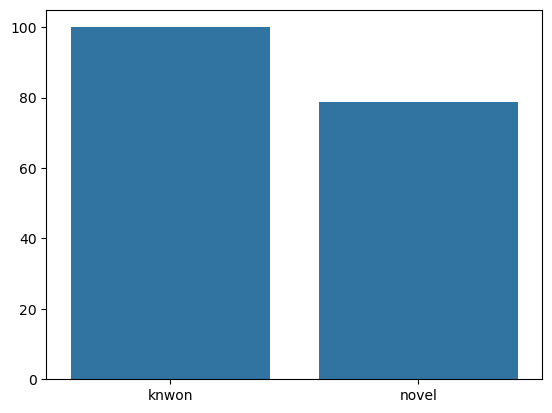

In [68]:
fig, ax = plt.subplots()
sns.barplot(data=df.to_pandas(), x="type", y="percent", ax = ax)
ax.set_ylabel("")
ax.set_xlabel("")

# Transcript Classification

## Load datasets

In [14]:
classification = pl.read_parquet("nextflow_results/V47/final_classification.parquet")
expression = pl.read_parquet("nextflow_results/V47/final_expression.parquet")

## Transcript classification histogram

In [31]:
reload(plotting)

<module 'src.plotting_functions' from '/gpfs/fs0/scratch/s/shreejoy/nxu/SFARI/src/plotting_functions.py'>

/gpfs/fs0/scratch/s/shreejoy/nxu/SFARI/src/plotting_functions.py:36: PolarsInefficientMapWarning: 
Expr.map_elements is significantly slower than the native expressions API.
Only use if you absolutely CANNOT implement your logic otherwise.
Replace this expression...
  - pl.col("structural_category2").map_elements(lambda x: ...)
with this one instead:
  + pl.col("structural_category2").replace_strict(structural_category_labels)

  structural_category2 = pl.col("structural_category2").map_elements(lambda x: structural_category_labels[x])
/gpfs/fs0/scratch/s/shreejoy/nxu/SFARI/src/plotting_functions.py:35: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  .with_columns(


null device 
          1 


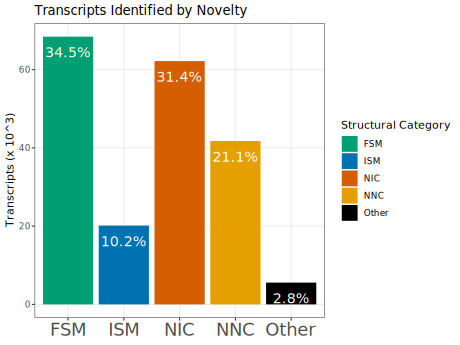

In [8]:
plotting.plot_transcript_class_hist(classification)

## Tanscript classification abundance

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


null device 
          1 


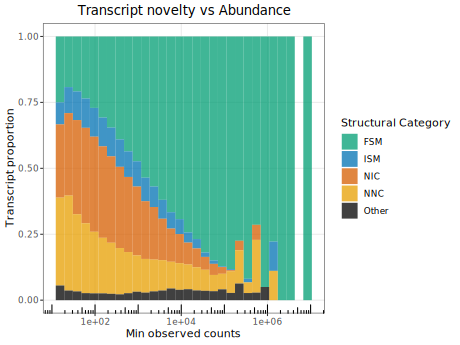

In [9]:
plotting.plot_transcript_class_abundance(classification, expression)

## Exon number vs transcript abundance

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


null device 
          1 


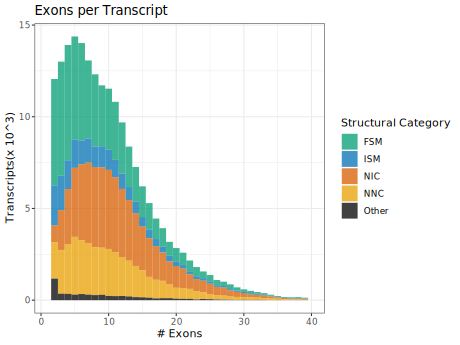

In [10]:
plotting.plot_nexon_vs_abundance(classification, expression)

## Plot transcript length vs abundance

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


null device 
          1 


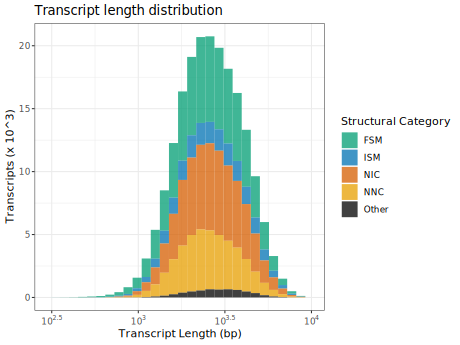

In [32]:
plotting.plot_len_vs_abundance(classification, expression)